In [1]:
from datasets import load_dataset
data = load_dataset("ExplosionNuclear/ExpNew7c")

README.md:   0%|          | 0.00/508 [00:00<?, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/9.71M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/14708 [00:00<?, ? examples/s]

In [ ]:
import re

MARKER = "for x:"
PREFIX = "Solve the following system of linear equations for x:"

def extract_system(example):
    
    s = example["question"]

    idx = s.lower().find(MARKER)
    if idx == -1:
        example["system"] = None
        return example

    system = s[idx + len(MARKER):].strip()

    system = re.sub(r"[ \t]+", " ", system)          
    system = re.sub(r"\n\s*\n+", "\n", system).strip()  

    example["system"] = f"{PREFIX}\n{system}"
    return example

ds2 = data.map(extract_system, desc="Extracting linear systems")



Extracting linear systems:   0%|          | 0/14708 [00:00<?, ? examples/s]

In [32]:
import random

TEXT_COL = "system"
K = 15
OUT_COL  = f"extended_{K}"
END_TOKEN = "[END]"

def add_extended_k(ds, k=K, text_col=TEXT_COL, out_col=OUT_COL, seed=0, end_token=END_TOKEN):
    rng = random.Random(seed)
    n = len(ds)

    def _map_fn(example, idx):
        items = []
        items.append(f"1) {ds[idx][text_col]}")
        items.append(end_token)  

        for i in range(2, k + 1):
            j = rng.randrange(n)
            items.append(f"{i}) {ds[j][text_col]}")

        example[out_col] = "\n".join(items)
        return example

    return ds.map(_map_fn, with_indices=True, desc=f"Building {out_col} with k={k}")

ds6 = add_extended_k(ds5, k=K, seed=42)


Building extended_15 with k=15:   0%|          | 0/14708 [00:00<?, ? examples/s]

In [33]:
keep_cols = ["extended_15", "extended_7", "extended_5", "extended_10", "final_answer"]
ds_kept = ds6.select_columns(keep_cols)


In [34]:
ds_kept

Dataset({
    features: ['extended_15', 'extended_7', 'extended_5', 'extended_10', 'final_answer'],
    num_rows: 14708
})

In [37]:
print(ds_kept["extended_7"][0])

1) Solve the following system of linear equations for x:
7x + y = 20
 10x + 7y = 62
[END]
2) Solve the following system of linear equations for x:
5x + 7y = -72
 -3x - y = 24
3) Solve the following system of linear equations for x:
x + y = -5
 -6x - 5y = 34
4) Solve the following system of linear equations for x:
-y = -1
 7x - 7y = 49
5) Solve the following system of linear equations for x:
-x - 9y = 51
 -x - 4y = 26
6) Solve the following system of linear equations for x:
x + 10y = -13
 -6x - 10y = -22
7) Solve the following system of linear equations for x:
-7x + 5y = 66
 10x - 5y = -75


In [24]:
print(ds_kept["final_answer"][0])

2


In [35]:
out_dir = "./data"
ds_kept.save_to_disk(out_dir)

Saving the dataset (0/1 shards):   0%|          | 0/14708 [00:00<?, ? examples/s]

In [27]:
from datasets import load_from_disk
dataset = load_from_disk("./data")

In [28]:
dataset

Dataset({
    features: ['extended_5', 'extended_10', 'final_answer'],
    num_rows: 14708
})

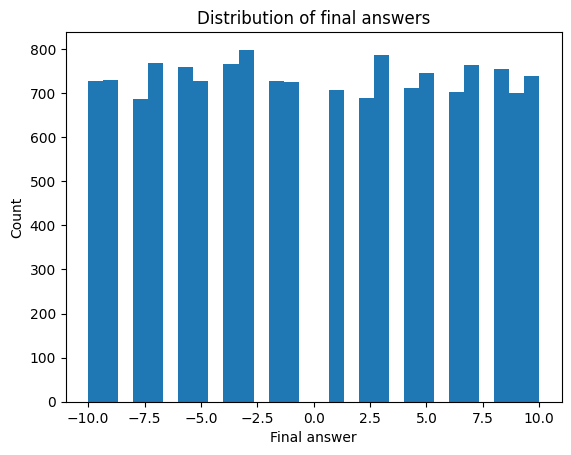

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
col = "final_answer"  # <-- имя колонки с финальными ответами

from datasets import load_dataset
import matplotlib.pyplot as plt


answers = ds5["final_answer"]

plt.figure()
plt.hist(answers, bins=30)
plt.xlabel("Final answer")
plt.ylabel("Count")
plt.title("Distribution of final answers")
plt.show()

In [58]:
import math
import matplotlib.pyplot as plt

L = {
    "8":  {"5": 6.48,   "10": 5.17,   "7": 5.99,   "15": 4.23},
    "5":  {"5": 6.4784, "10": 5.188,  "7": 6.0289,"15": 4.238},
    "35": {"5": 3.1},   # ← добавили
}


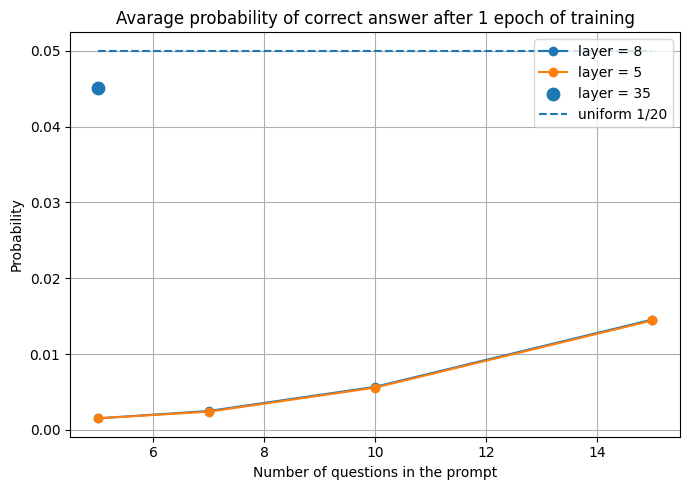

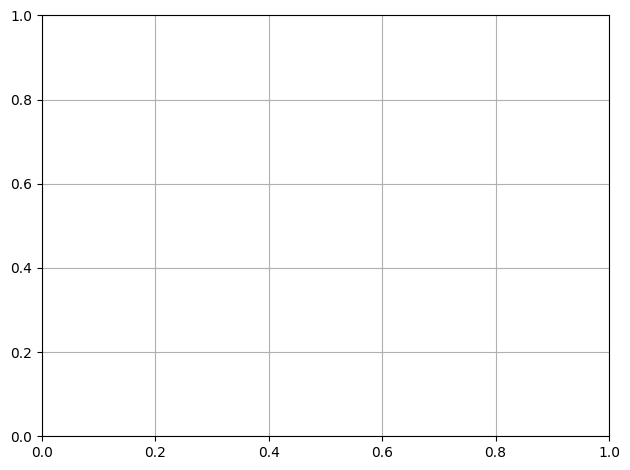

In [61]:
plt.figure(figsize=(7, 5))

# Кривые
for key in ["8", "5"]:
    xs = sorted(int(x) for x in L[key].keys())
    ys = [math.exp(-L[key][str(x)]) for x in xs]
    plt.plot(xs, ys, marker="o", label=f"layer = {key}")

# Одиночные точки
for key in ["35"]:
    x = 5
    y = math.exp(-L[key]["5"])
    plt.scatter([x], [y], s=80, zorder=3, label=f"layer = {key}")


xs_all = sorted({int(x) for d in L.values() for x in d.keys()})
plt.hlines(
    y=1/20,
    xmin=min(xs_all),
    xmax=max(xs_all),
    linestyles="dashed",
    label="uniform 1/20"
)


plt.xlabel("Number of questions in the prompt")
plt.ylabel("Probability")
plt.title("Avarage probability of correct answer after 1 epoch of training")
plt.legend()
plt.legend()
plt.grid(True)
plt.tight_layout()

# ===== СОХРАНЕНИЕ =====
plt.savefig("probability_curves.png", dpi=300)
plt.savefig("probability_curves.pdf")  # если нужно для статьи
# =====================

plt.show()

plt.grid(True)
plt.tight_layout()
plt.show()


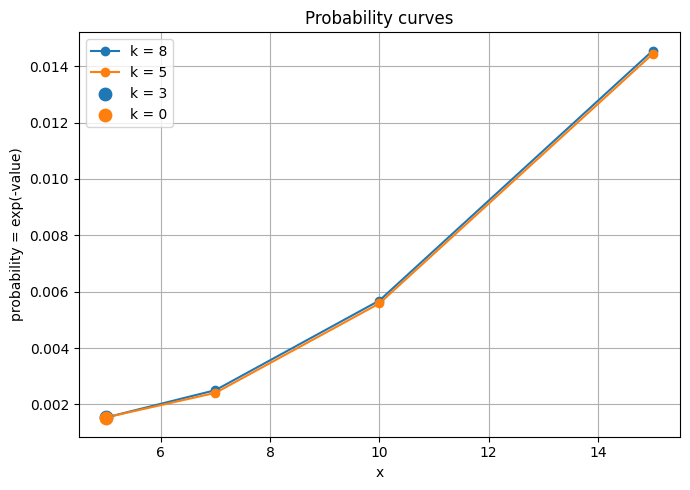

In [45]:
plt.figure(figsize=(7, 5))

# Кривые
for key in ["8", "5"]:
    xs = sorted(int(x) for x in L[key].keys())
    ys = [math.exp(-L[key][str(x)]) for x in xs]
    plt.plot(xs, ys, marker="o", label=f"k = {key}")

# Одиночные точки
for key in ["3", "0"]:
    x = 5
    y = math.exp(-L[key]["5"])
    plt.scatter([x], [y], s=80, zorder=3, label=f"k = {key}")

plt.xlabel("x")
plt.ylabel("probability = exp(-value)")
plt.title("Probability curves")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
